In [1]:
from matplotlib.scale import scale_factory
import numpy as np

import matplotlib.pyplot as plt

import networkx as nx

from description.kinematics import JointPoint

graph = nx.Graph()


In [2]:

abs_ground = np.array([0.065, 0, -0.047])
pos_toeA_joint = np.array([0.060, 0, -0.052]) - abs_ground
pos_toeA_tarus_joint = np.array([-0.273, 0, -0.350]) - abs_ground
pos_shin_joint = np.array([0.021, 0, -0.159]) - abs_ground
pos_knee_spring = np.array([0.011, 0, -0.219]) - abs_ground
pos_tarus_joint = np.array([-0.237, 0, -0.464]) - abs_ground
pos_foot_joint = np.array([-0.080, 0, -0.753]) - abs_ground
pos_molet_joint = np.array([-0.207, 0, -0.552]) - abs_ground
pos_toeB_joint = np.array([-0.257, 0, -0.579]) - abs_ground
pos_toeB_foot_joint = np.array([-0.118, 0, -0.776]) - abs_ground

ground_joint = JointPoint(
    r=np.zeros(3), w=np.array([0, 1, 0]), attach_ground=True, active=True
)
shin_joint = JointPoint(r=pos_shin_joint, w=np.array([0, 1, 0]), active=True)
tarus_joint = JointPoint(r=pos_tarus_joint, w=np.array([0, 1, 0]))
foot_joint = JointPoint(
    r=pos_foot_joint, w=np.array([0, 1, 0]), attach_endeffector=True
)

toeA_joint = JointPoint(r=pos_toeA_joint, w=np.array([0, 1, 0]))
connect_toeA_tarus_joint = JointPoint(
    r=pos_toeA_tarus_joint, w=np.array([0, 1, 0])
)

jts = [
    ground_joint,
    shin_joint,
    tarus_joint,
    foot_joint,
    toeA_joint,
    connect_toeA_tarus_joint,
]

main_branch = [ground_joint, shin_joint, tarus_joint, foot_joint]
add_branch_1 = [
    [ground_joint, shin_joint],
    toeA_joint,
    connect_toeA_tarus_joint,
    [tarus_joint, foot_joint],
]


In [3]:

# scale_factor = 4
# abs_ground = np.array([0.0, 0, 0.0]) / scale_factor
# main_J1 = np.array([1.011, 0, 1.075]) / scale_factor
# main_J2 = np.array([0.988, 0, 2.823]) / scale_factor
# main_J3 = np.array([2.396, 0, 3.461]) / scale_factor
# ground_2 = np.array([-1.602, 0, 0.0]) / scale_factor
# branch_1_J1 = np.array([-1.216, 0, 1.317]) / scale_factor
# branch_1_J2 = np.array([0.134, 0, 1.849]) / scale_factor
# branch_2_J1 = np.array([-0.808, 0, 2.862]) / scale_factor
# branch_2_J2 = np.array([0.849, 0, 3.814]) / scale_factor

# print(main_J3)

# ground_joint = JointPoint(
#     r=np.zeros(3), w=np.array([0, 1, 0]), attach_ground=True, active=True, name="Gabs"
# )
# JPm_J1 = JointPoint(r=main_J1, w=np.array([0, 1, 0]), active=True, name="J1m")
# JPm_J2 = JointPoint(main_J2, w=np.array([0, 1, 0]), name="J2m", attach_endeffector=True)
# JPm_J3 = JointPoint(
#     r=main_J3, w=np.array([0, 1, 0]), name="J3m", attach_endeffector=True
# )


# ground_joint_2 = JointPoint(
#     r=ground_2, w=np.array([0, 1, 0]), attach_ground=True, name="G2"
# )
# JPb1_J1 = JointPoint(r=branch_1_J1, w=np.array([0, 1, 0]), name="J1b1")
# JPb1_J2 = JointPoint(r=branch_1_J2, w=np.array([0, 1, 0]), name="J2b1")

# JPb2_J1 = JointPoint(r=branch_2_J1, w=np.array([0, 1, 0]), name="J1b2")
# JPb2_J2 = JointPoint(
#     r=branch_2_J2, w=np.array([0, 1, 0]), name="J2b2", attach_endeffector=True
# )


# jts = [
#     ground_joint,
#     JPm_J1,
#     JPm_J2,
#     JPm_J3,
#     ground_joint_2,
#     JPb1_J1,
#     JPb1_J2,
#     JPb2_J1,
#     JPb2_J2,
# ]

# main_branch = [ground_joint, JPm_J1, JPm_J2, JPm_J3]
# add_branch_1 = [
#     ground_joint_2,
#     JPb1_J1,
#     JPb1_J2,
#     [JPm_J1, JPm_J2]
# ]
# add_branch_2 = [
#     [JPb1_J1, JPb1_J2],
#     JPb2_J1,
#     JPb2_J2,
#     [JPm_J2, JPm_J3]
# ]



In [4]:
from description.builder import add_branch

# add_branch(graph, [main_branch, add_branch_1, add_branch_2])
add_branch(graph, [main_branch, add_branch_1])


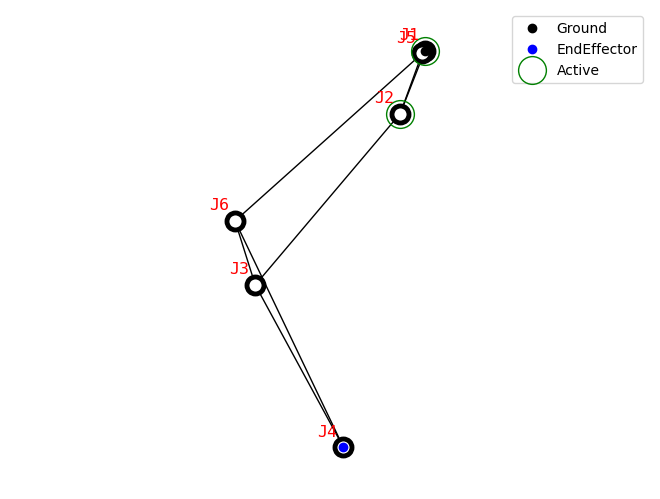

In [5]:
from description.utils import draw_joint_point, draw_link_frames

draw_joint_point(graph) 
plt.show()


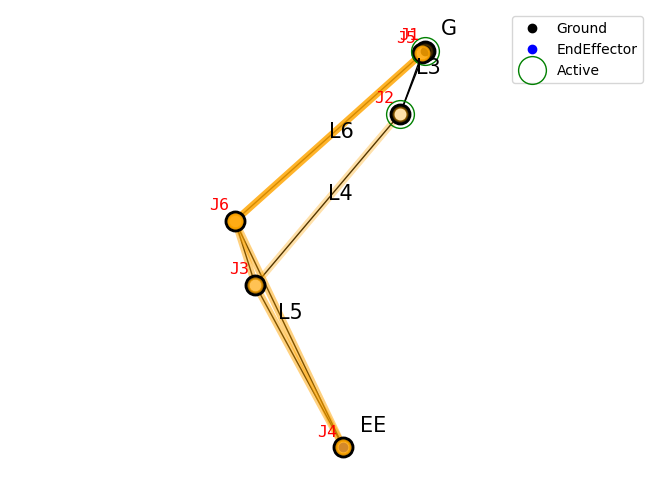

In [6]:
from description.mechanism import JointPoint2KinematicGraph
from description.utils import draw_links

kinematic_graph = JointPoint2KinematicGraph(graph)
draw_links(kinematic_graph, graph)
plt.show()


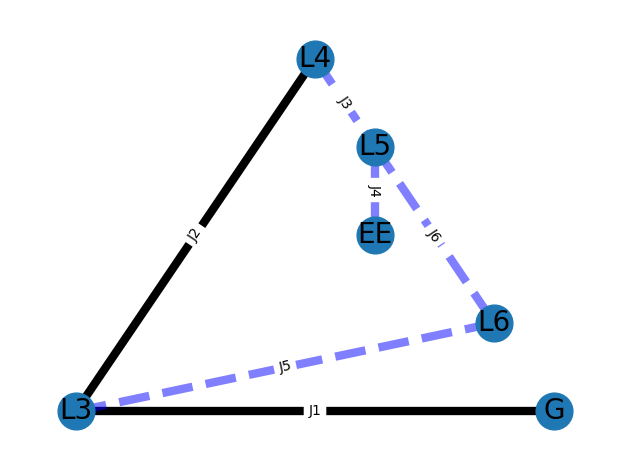

In [7]:
from description.utils import draw_kinematic_graph

draw_kinematic_graph(kinematic_graph)
plt.show()


L3 G 630.012
L3 L4 620.04
L3 L6 20.045
L4 L5 10.033
L5 EE 0.0
L5 L6 10.045


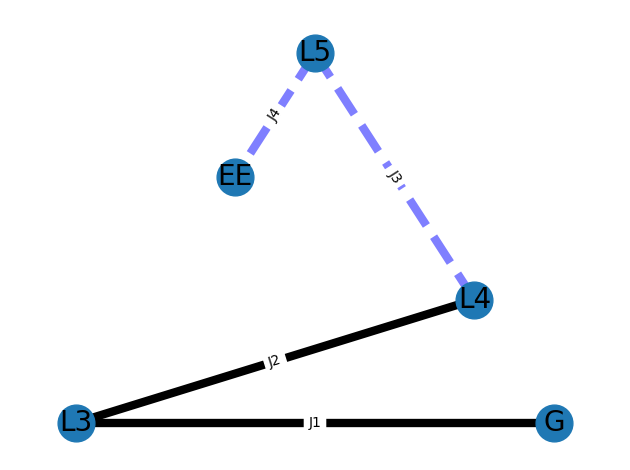

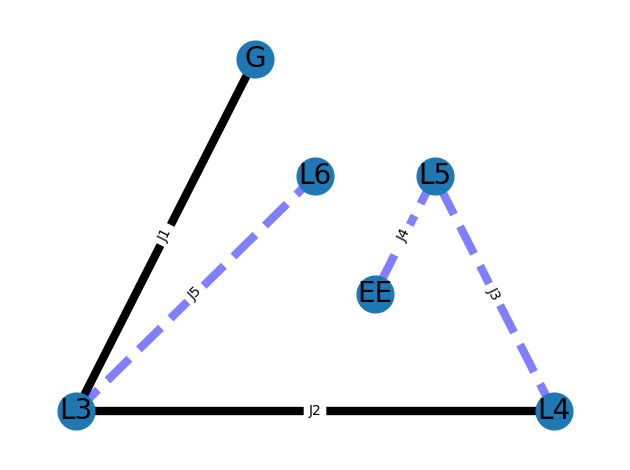

In [8]:

kinematic_graph.define_main_branch()
kinematic_tree = kinematic_graph.define_span_tree()
# print([l.name for l in kinematic_graph.main_branch])
draw_kinematic_graph(kinematic_graph.main_branch)
plt.show()
draw_kinematic_graph(kinematic_tree)
plt.show()

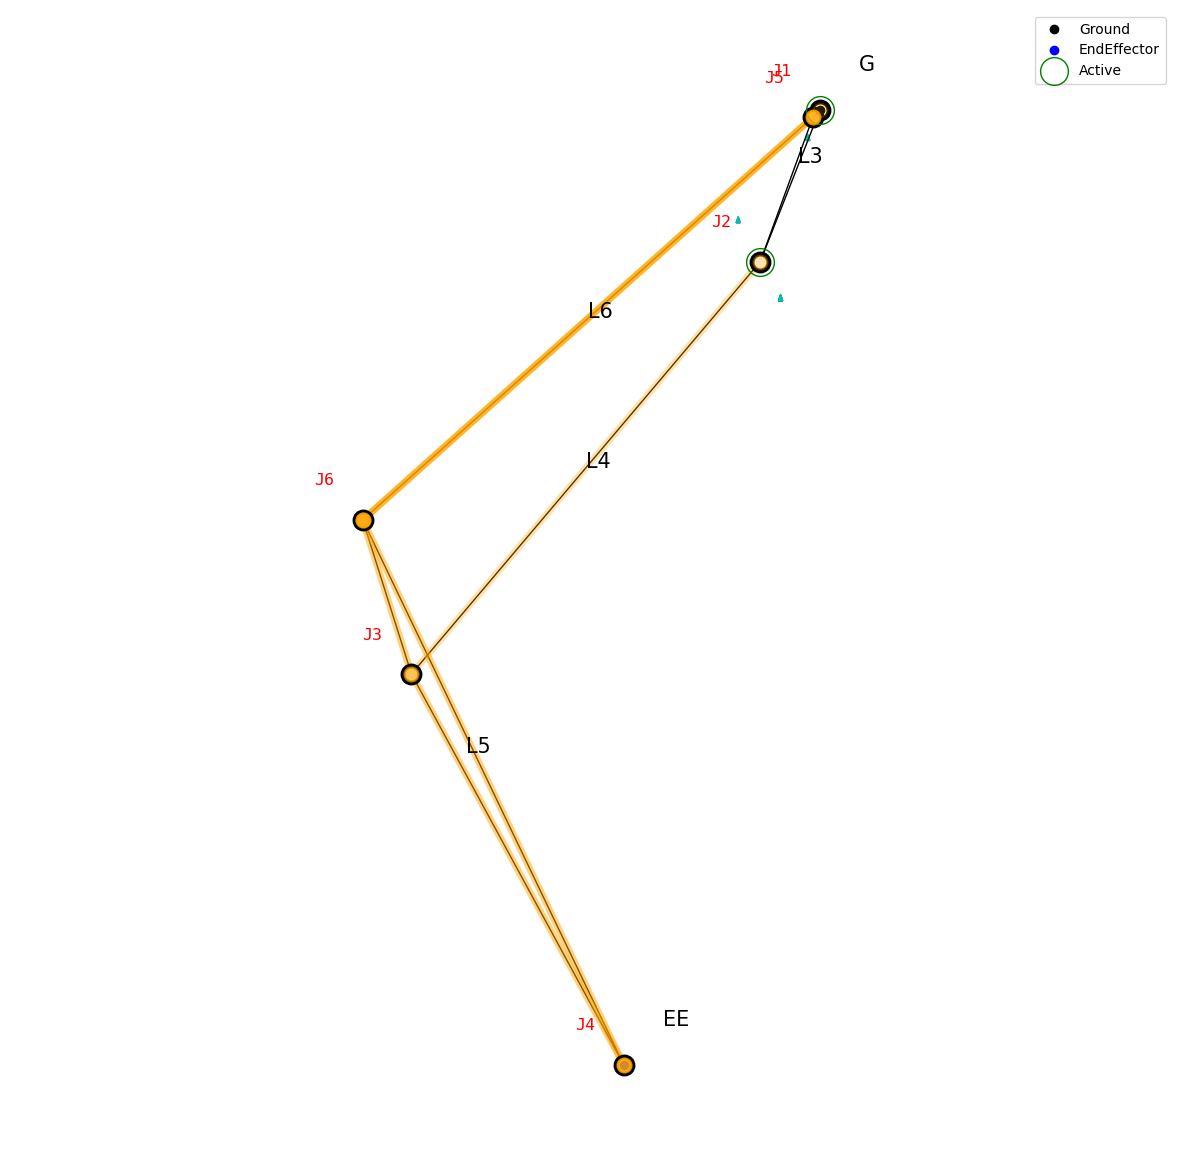

In [9]:

kinematic_graph.define_link_frames()

draw_link_frames(kinematic_graph)
draw_links(kinematic_graph, graph)
plt.show()

# from description.builder import create_urdf

# urdf = create_urdf(kinematic_graph)

# with open("ThreeTriangles.urdf", "w") as f:
#     f.write(urdf.urdf())

# for eq in (kinematic_graph.edges() - kinematic_tree.edges()):
#     print(f"Link 1: {eq[0]}, Link 2: {eq[1]}, Joint: {kinematic_graph.edges()[eq]['joint'].name}")

In [12]:
for link in kinematic_graph.nodes():
    print(link.name)
    print(link.frame)

L3
[[-0.93075149 -0.         -0.36565237  0.        ]
 [ 0.          1.         -0.          0.        ]
 [ 0.36565237  0.         -0.93075149  0.        ]
 [ 0.          0.          0.          1.        ]]
G
[[ 1.     0.     0.    -0.145]
 [ 0.     1.     0.     0.   ]
 [ 0.     0.     1.    -0.706]
 [ 0.     0.     0.     1.   ]]
L4
[[-0.76348123 -0.         -0.64583002 -0.044     ]
 [ 0.          1.         -0.          0.        ]
 [ 0.64583002  0.         -0.76348123 -0.112     ]
 [ 0.          0.          0.          1.        ]]
L5
[[-0.87870769  0.          0.47736023 -0.302     ]
 [ 0.          1.          0.          0.        ]
 [-0.47736023  0.         -0.87870769 -0.417     ]
 [ 0.          0.          0.          1.        ]]
EE
[[ 1.     0.     0.    -0.145]
 [ 0.     1.     0.     0.   ]
 [ 0.     0.     1.    -0.706]
 [ 0.     0.     0.     1.   ]]
L6
[[-0.66686027 -0.         -0.74518278 -0.005     ]
 [ 0.          1.         -0.          0.        ]
 [ 0.74518278  0